In [6]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Rect:
    def __init__(self, left, bottom, right, top):
        self.left = left
        self.bottom = bottom
        self.right = right
        self.top = top

    def area(self):
        return (self.right - self.left) * (self.top - self.bottom)

    def coords(self):
        return (self.left, self.bottom, self.right, self.top)

    def contains(self, point):
        return (self.left <= point.x <= self.right) and \
               (self.bottom <= point.y <= self.top)

In [17]:
import random

def gen_points_uniform(rect, count):
    points = []
    x_min, y_min, x_max, y_max = rect.coords()
    for _ in range(count):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        points.append(Point(x, y))
    return points

def compute_min_rect(Q, points):
    points = list(filter(lambda p: Q.contains(p), points))
    if len(points) == 0:
        return Rect(0, 0, 0, 0)
    elif len(points) == 1:
        return Rect(points[0].x, points[0].y,
                    points[0].x, points[0].y)
    else:
        x_min = min(map(lambda p: p.x, points))
        x_max = max(map(lambda p: p.x, points))
        y_min = min(map(lambda p: p.y, points))
        y_max = max(map(lambda p: p.y, points))
        return Rect(x_min, y_min, x_max, y_max)

def true_risk(count, X, Q):
    points = gen_points_uniform(X, count)
    return (Q.area() - compute_min_rect(Q, points).area()) / X.area()

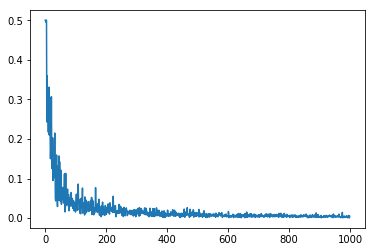

In [55]:
from matplotlib import pyplot as plt

x_range = range(1000)
X = Rect(0, 0, 1, 1)
Q = Rect(0, 0, 2.0 ** (-0.5), 2.0 ** (-0.5))
plt.plot(x_range, [true_risk(count, X, Q) for count in x_range])
plt.show()

In [56]:
# Find m for given average true risk
# 10% -> 42
# 1% -> 430
# 0.1% -> 3100
calls_amount = 20
count = 1
percent = 0.5
while percent >= 0.001:
    percent_new = sum([true_risk(count, X, Q) for _ in range(calls_amount)]) / calls_amount
    if percent_new <= 0.1 <= percent:
        print("10% hit: " + str(count))
    if percent_new <= 0.01 <= percent:
        print("1% hit: " + str(count))
    if percent_new <= 0.001 <= percent:
        print("0.1% hit: " + str(count))
    percent = percent_new
    count = count + 1

10% hit: 37
10% hit: 45
1% hit: 319
1% hit: 349
1% hit: 356
1% hit: 363
1% hit: 365
1% hit: 379
1% hit: 385
1% hit: 388
1% hit: 394
1% hit: 397
1% hit: 400
1% hit: 405
1% hit: 407
1% hit: 413
1% hit: 415
1% hit: 417
1% hit: 421
1% hit: 427
1% hit: 429
1% hit: 432
1% hit: 437
1% hit: 440
1% hit: 447
1% hit: 451
1% hit: 465
1% hit: 474
0.1% hit: 3104
